+ 
## Import & Setting

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import config
import os
import utils
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor

data = config.config()

+ 
## Functions

In [2]:
def cal_error_regression(depth_name_list, df_regression):
    reg_depth_error, reg_depth_error_rate, reg_depth_error_rate_avg, reg_depth = utils.melt_to_col(depth_name_list,
                                                                                                   df_regression)
    reg_depth_diff = utils.create_dataframe(reg_depth_error, depth_name_list)
    reg_depth_reg = utils.create_dataframe(reg_depth, depth_name_list)
    df_depth_reg_error_rate = utils.df_to_error_rate_list(reg_depth_reg)
    return reg_depth_diff, df_depth_reg_error_rate

In [3]:
def set_regression(depth_list, depth_name_list, degree=2):
    df_depth_reggresion = pd.DataFrame(depth_list, depth_name_list).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(df_depth_reggresion['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    # lin_reg_2 = Ridge()
    lin_reg_2.fit(df_feature, df_depth_reggresion['variable'].values)
    utils.write_coef(data.file_manager.save_path, np.array(lin_reg_2.coef_), degree)
    # lin_reg_2 = RANSACRegressor(random_state=0).fit(df_feature, df_depth_reggresion['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    df_depth_reggresion['regression'] = lin_reg_2.predict(
        poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    return df_depth_reggresion

In [4]:
def boxplot(df_diff, df_rate):
    df_mean = df_diff.T.mean()
    ax = df_diff.T.plot(kind='box')
    ax.plot(ax.get_xticks(), df_mean, color='orange', linewidth=0.5, marker='o', markersize=0.8)
    # for i in range(len(df_rate)):
    #     ax.text(ax.get_xticks()[i]-0.15, -1.5, "{}%".format(round(df_rate[i], 2)), fontsize=7.5, color='red')
    plt.xlabel('depth(m)')
    plt.ylabel('error(m)')
    plt.grid(True)
    plt.title('average error rate : {}%'.format(round(float(sum(df_rate) / len(df_rate)), 2)))
    plt.show()

+ 
## Set variable (Road)

In [5]:
category = 'road'

+ 
## Read gt_distance

In [6]:
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category))
data.file_manager.path_category_update(category)

gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                         data.file_manager.gt_distance_path)
folder_names = gt_dist.keys()
scale = data.file_manager.scale_num
degree = data.file_manager.degree_num

+ 
## Load depth list

In [7]:
depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
    data.file_manager.save_path,
    gt_dist, folder_names,
    scale)

+ 
## Plot - original

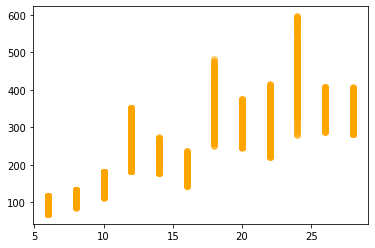

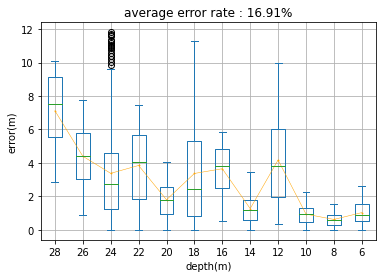

In [8]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

+ 
## Plot - mode

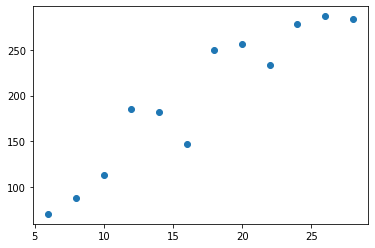

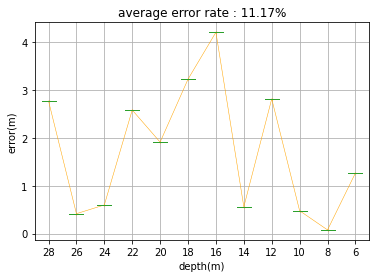

In [9]:
    df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
    df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
    plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
    df_depth_mode_regression.to_csv(
        data.file_manager.regression_data + os.path.join('/', category) +
        os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
    boxplot(df_reg_diff_mode, df_error_rate_mode)

+ 
## Plot - bottom line

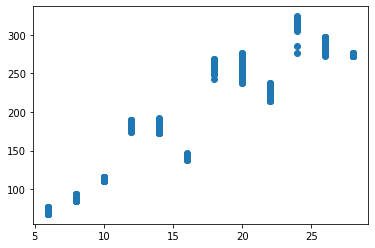

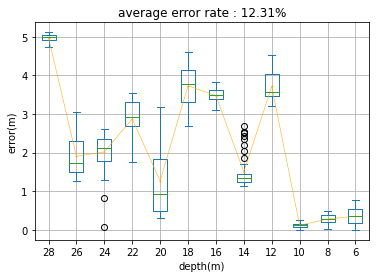

In [10]:
    df_depth_bottom_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list))
    df_depth_bottom_regression = set_regression(bottom_depth_list, depth_name_list)
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_bottom_regression)
    plt.scatter(df_depth_bottom_regression['variable'].values, df_depth_bottom_regression['value'].values)
    df_depth_bottom_regression.to_csv(
        data.file_manager.regression_data + os.path.join('/', category) +
        os.path.join('/', 'regression_bottom_line_{}.csv'.format(degree)))
    boxplot(df_reg_diff_mode, df_error_rate_mode)

+ 
## Plot - options

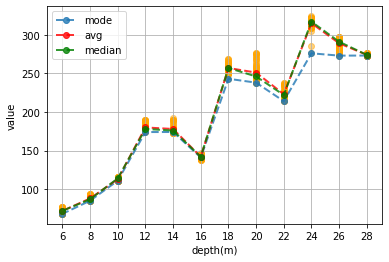

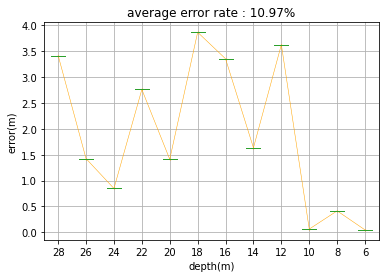

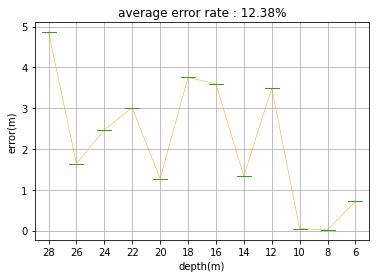

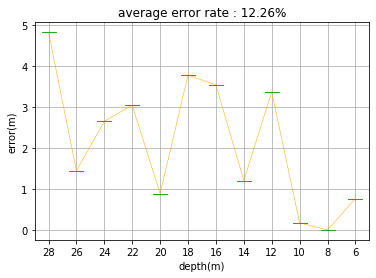

In [11]:
    df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list))
    df_depth_avg_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list), 'avg')
    df_depth_median_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list), 'median')
    df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list, degree=degree)
    df_depth_avg_regression = set_regression(df_depth_avg_list, depth_name_list, degree=degree)
    df_depth_median_regression = set_regression(df_depth_median_list, depth_name_list, degree=degree)
    plt.scatter(df_depth_bottom_regression['variable'].values, df_depth_bottom_regression['value'].values, c="orange",
                alpha=0.5)
    plt.plot(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8)
    plt.plot(df_depth_avg_regression['variable'].values, df_depth_avg_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8, c="red")
    plt.plot(df_depth_median_regression['variable'].values, df_depth_median_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8, c="green")
    plt.legend(['mode', 'avg', 'median'])
    plt.grid(True)
    plt.xticks(depth_name_list)
    plt.xlabel('depth(m)')
    plt.ylabel('value')
    plt.show()
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
    df_reg_diff_avg, df_error_rate_avg = cal_error_regression(depth_name_list, df_depth_avg_regression)
    df_reg_diff_median, df_error_rate_median = cal_error_regression(depth_name_list, df_depth_median_regression)
    boxplot(df_reg_diff_mode, df_error_rate_mode)
    boxplot(df_reg_diff_avg, df_error_rate_avg)
    boxplot(df_reg_diff_median, df_error_rate_median)

*****

# Plot - *ground*

+ 
## Initialize *ground* configuration

In [12]:
data = config.config()

+ 
## Set variable (*ground*)

In [13]:
category = 'ground'
direction_ewns = 'east'

+ 
## *ground* path check

In [14]:
data.file_manager.path_category_update(category, direction_ewns)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_ewns)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_ewns))

+ 
## Read *gt_distance*

In [15]:
    gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                             data.file_manager.gt_distance_path)
    folder_names = gt_dist.keys()
    scale = data.file_manager.scale_num
    degree = data.file_manager.degree_num
    depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
        data.file_manager.save_path,
        gt_dist, folder_names,
        scale,
        ground=True)

0004
83 190 
331 190 
585 191 
0006
153 177 
329 176 
508 173 
0008
66 159 
191 157 
325 158 
463 156 
582 154 
0010
21 146 
113 146 
216 146 
323 145 
432 144 
534 143 
627 143 
0012
62 139 
143 139 
229 139 
320 138 
413 138 
499 137 
580 137 
0014
27 134 
94 134 
167 134 
242 134 
320 134 
400 132 
475 133 
545 132 
613 131 
0016
60 131 
122 127 
186 130 
252 129 
320 129 
391 128 
457 128 
519 128 
580 128 
0018
87 127 
142 125 
200 127 
260 126 
320 126 
383 126 
442 124 
499 125 
554 123 
0020
108 124 
159 123 
211 124 
266 123 
320 123 
376 122 
429 123 
482 122 
533 122 


+ 
## Plot - *east*

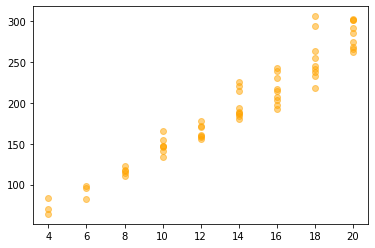

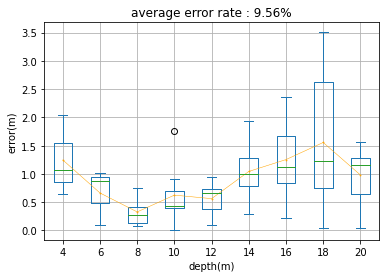

In [16]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

+ 
## Plot - *east*

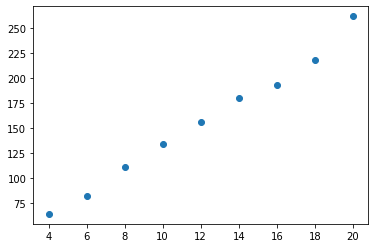

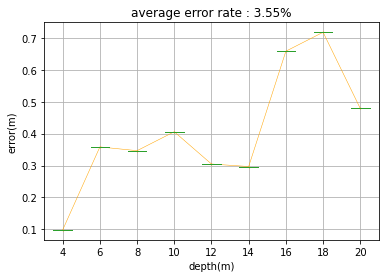

In [17]:
df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
df_depth_mode_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
boxplot(df_reg_diff_mode, df_error_rate_mode)

+ 
## Plot selected distance (0020) ->*20m*

In [ ]:
folder_names_list = list(folder_names)
selected_dist = folder_names_list[-1] # 0020 -> 20m
data.file_manager.depth_file = utils.rand_img(data.file_manager.depth_path + os.path.join('/', selected_dist))
selected_dist_path = data.file_manager.depth_path + os.path.join('/', selected_dist, data.file_manager.depth_file)
selected_depth_list = utils.coord_to_depth(selected_dist_path, box_coord)